In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("max_colwidth", 400)

import json


Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
490,application_1632762077345_0492,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [2]:
path_raw = 's3://mist-secorapp-production/ap-events/ap-events-production/dt=2021-11-*/*'
ap_raw = sc.sequenceFile(path_raw)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [3]:
oc_raw = ap_raw.map(lambda x: json.loads(x[1]))


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [4]:
data_list = oc_raw.filter(lambda x: x.get("source") is not None and x.get("source").get("ev_name") is not None and x['source']['ev_name']  == 'SW_ALARM_CHASSIS_PARTITION').collect()
df = pd.json_normalize(data_list)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [5]:
df.groupby(['switch_id']).size().sort_values(ascending=False)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

switch_id
f07cc7d724bf    288
4c6d58698a91    268
182ad381f5b9    243
40deada6b1c3    236
94f7ad396217    218
1c9c8cbcd0c1    179
44ecce556b25    161
fc3342e9a97d    160
fc3342a1241c    145
045c6c5634a3    143
e8a245135d58    135
ec94d5785f31    135
1039e9cd98f4    132
045c6c567205    125
c8fe6a5db274    119
408f9db018ff    111
fc3342a0e7ad    110
f04b3a7cdeaf    109
f07cc76690fc    105
ec3873d05449    102
3c8c93ab6022    102
408f9db019f2    101
4c6d586e4fed     99
0805e2470bef     98
045c6c562708     87
5800bbb74f1e     85
78507c705245     84
80acac539520     79
408f9dbfc2f5     79
94f7addb5def     76
045c6c560eab     75
f4bfa81550db     73
3c8c93a773fa     69
78507c703e05     69
0c599ceefb83     64
f4bfa815a69a     64
c0bfa7152c14     63
78507c7202fa     60
f4bfa815605c     59
50c70995a9b5     59
f4bfa8157724     59
f4bfa8cdb2ea     58
ec94d58f88da     56
f07cc76559d8     56
f07cc7651efe     56
00c52cf836e7     55
00c52cf83e2e     54
408f9dbfdce7     53
f4bfa816ebfc     52
8890093515

In [6]:
data_list = oc_raw.filter(lambda x: x.get("switch_id") == "f07cc7d724bf").filter(lambda x: x.get("source") is not None and x.get("source").get("ev_name") is not None and x['source']['ev_name'] == 'SW_ALARM_CHASSIS_PARTITION').collect()
df = pd.json_normalize(data_list)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [7]:
df.columns

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Index(['event_type', 'site_id', 'org_id', 'timestamp', 'device_type',
       'switch_id', 'source.org', 'source.site', 'source.mac', 'source.model',
       'source.ev_name', 'source.fw_version', 'source.version', 'source.ev_ts',
       'source.detail', 'source.client', 'source.device_type',
       'source.alarm_class', 'source.alarm_type'],
      dtype='object')

In [7]:
len(df.index)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

288

In [8]:
a = df['source.detail'].unique()
a

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

array(['RE 0 /var partition usage is high'], dtype=object)

In [9]:
b = df['source.alarm_type'].unique()
b

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

array(['Chassis'], dtype=object)

In [10]:
c = df['source.alarm_class'].unique()
c

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

array(['Minor'], dtype=object)

In [11]:
d = df['source.ev_name'].unique()
d

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

array(['SW_ALARM_CHASSIS_PARTITION'], dtype=object)

In [12]:
data_list[0]

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

{'event_type': 'device_events', 'site_id': 'a76cbac2-76d7-4f18-a716-c54aa62d9456', 'org_id': '379a5247-10da-4800-b6fe-b404e2830319', 'timestamp': 1635729235000000, 'source': {'org': '379a5247-10da-4800-b6fe-b404e2830319', 'site': 'a76cbac2-76d7-4f18-a716-c54aa62d9456', 'mac': 'f07cc7d724bf', 'model': 'EX3400-48P', 'ev_name': 'SW_ALARM_CHASSIS_PARTITION', 'fw_version': '20.2R3.9', 'version': 1, 'ev_ts': 1635729235, 'detail': 'RE 0 /var partition usage is high', 'client': '00-00-00-00-00-00', 'device_type': 'switch', 'alarm_class': 'Minor', 'alarm_type': 'Chassis'}, 'device_type': 'switch', 'switch_id': 'f07cc7d724bf'}

In [13]:
df['date'] = pd.to_datetime(df['timestamp']/1000, unit='ms')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [14]:
from datetime import datetime

df['time'] = df['date'].dt.strftime("%H:%M:%S")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [15]:
df['time'].head(5)


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

0    01:13:55
1    02:33:55
2    03:57:55
3    05:21:55
4    06:43:55
Name: time, dtype: object

In [16]:
viz_series = df.groupby(['time']).size().sort_values(ascending=False)
viz_df = pd.DataFrame({'time':viz_series.index, 'count':viz_series.values})
viz_df = viz_df.sort_values('time')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [17]:
viz_df.head(5)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

         time  count
1    00:06:14      1
144  00:08:07      1
195  00:08:15      1
194  00:14:00      1
193  00:24:04      1

In [18]:
plt.clf()


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

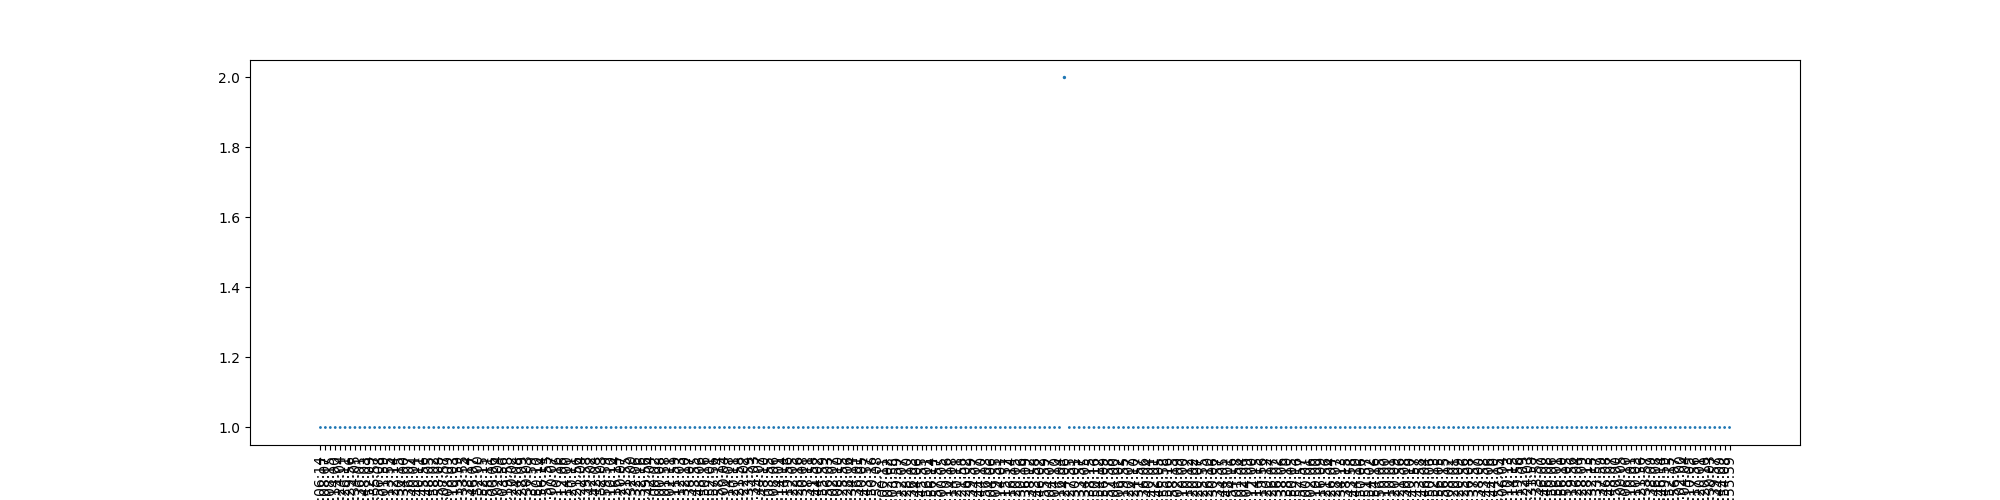

In [19]:
plt.figure(figsize=(20,5))

plt.xticks(rotation=90)
plt.rcParams['axes.labelsize'] = 25
plt.scatter(x=viz_df['time'], y=viz_df['count'], s=viz_df['count'])


plt.show()
%matplot plt

In [20]:
date_series = df.groupby(['date']).size().sort_values(ascending=False)
date_df = pd.DataFrame({'date':date_series.index, 'count':date_series.values})
date_df = date_df.sort_values('date')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [21]:
date_df.head(5)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                   date  count
1   2021-11-01 01:13:55      1
144 2021-11-01 02:33:55      1
195 2021-11-01 03:57:55      1
194 2021-11-01 05:21:55      1
193 2021-11-01 06:43:55      1

In [22]:
clone_df = date_df[['date', 'count']].copy()
clone_df = clone_df.set_index('date').resample('60min').sum()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [23]:
clone_df.index.name = 'date'

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [24]:
clone_df.head(5)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                     count
date                      
2021-11-01 01:00:00      1
2021-11-01 02:00:00      1
2021-11-01 03:00:00      1
2021-11-01 04:00:00      0
2021-11-01 05:00:00      1

In [25]:
clone_df['date'] = clone_df.index

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [26]:
clone_df['time'] = clone_df['date'].dt.strftime("%H:%M:%S")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [27]:
plt.clf()


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

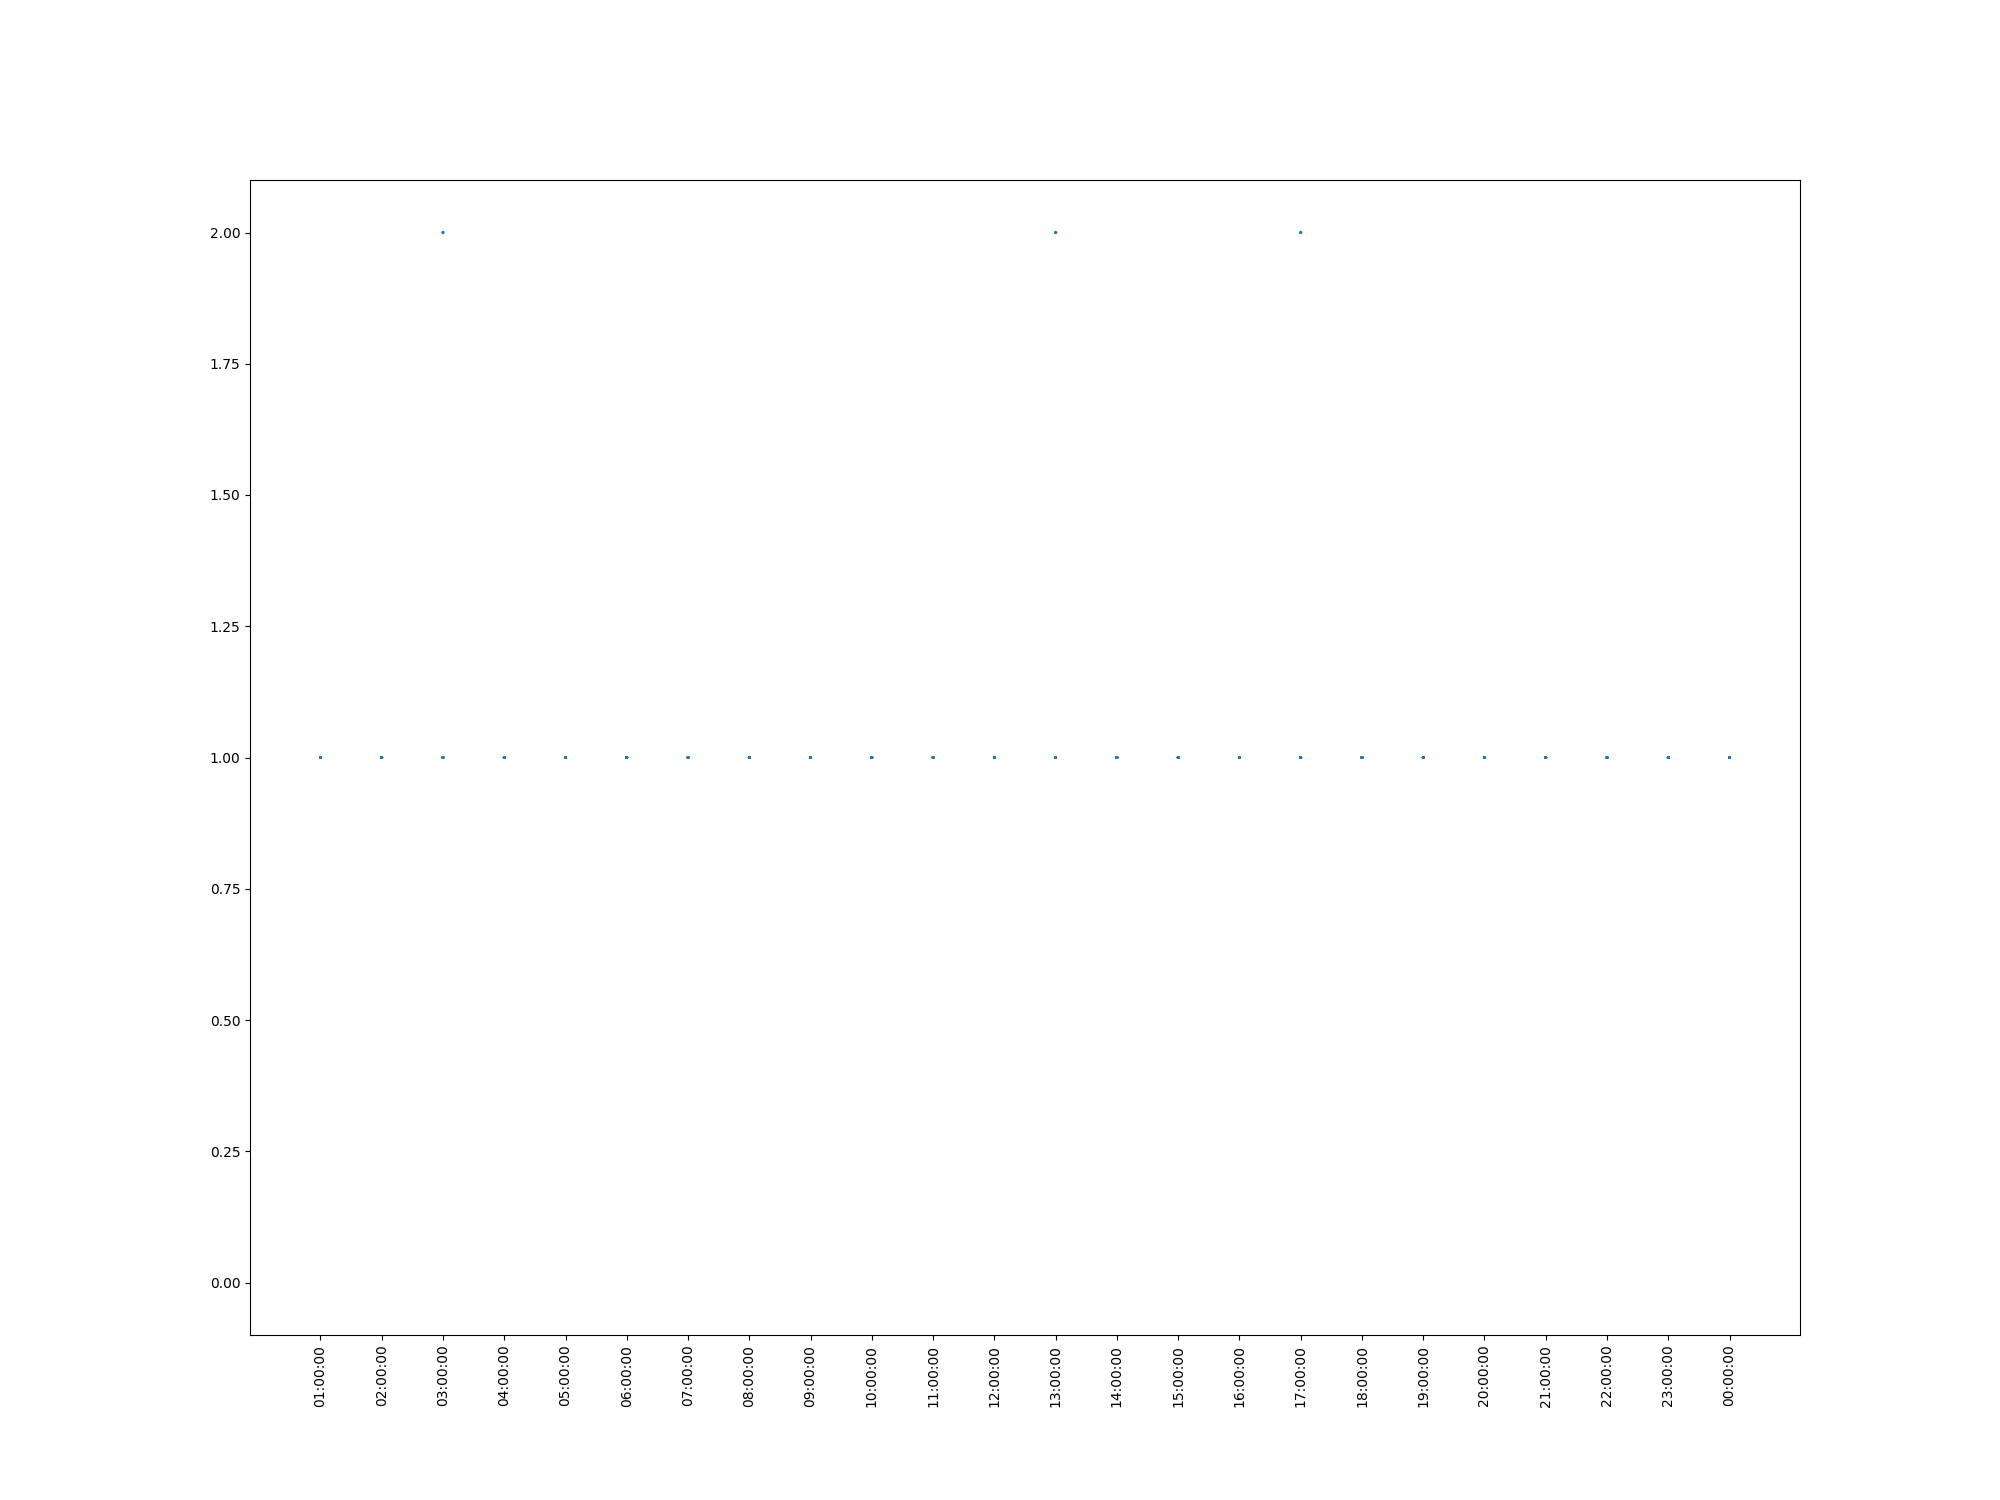

In [28]:
plt.figure(figsize=(20,15))

plt.xticks(rotation=90)
plt.rcParams['axes.labelsize'] = 25
plt.scatter(x=clone_df['time'], y=clone_df['count'], s=clone_df['count'])


plt.show()
%matplot plt

In [29]:
max(clone_df['count'])

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

2

In [30]:
clone_df.loc[clone_df['count'] == 4]


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Empty DataFrame
Columns: [count, date, time]
Index: []

In [31]:
clone_df['count'].mean()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

0.8158640226628895

In [32]:
date_df.head(5)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                   date  count
1   2021-11-01 01:13:55      1
144 2021-11-01 02:33:55      1
195 2021-11-01 03:57:55      1
194 2021-11-01 05:21:55      1
193 2021-11-01 06:43:55      1

In [33]:
date_df['time_delta'] = date_df['date'] - date_df['date'].shift()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [34]:
date_df.head(5)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                   date  count      time_delta
1   2021-11-01 01:13:55      1             NaT
144 2021-11-01 02:33:55      1 0 days 01:20:00
195 2021-11-01 03:57:55      1 0 days 01:24:00
194 2021-11-01 05:21:55      1 0 days 01:24:00
193 2021-11-01 06:43:55      1 0 days 01:22:00

In [35]:
time_delta_series = date_df.groupby(['time_delta']).size().sort_values(ascending=False)
delta_df = pd.DataFrame({'time_delta':time_delta_series.index, 'count':time_delta_series.values})
delta_df = delta_df.sort_values('time_delta')

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [36]:
delta_df.head(5)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

        time_delta  count
30 0 days 00:22:01      1
33 0 days 00:24:00      1
24 0 days 00:48:00      2
22 0 days 00:52:00      2
13 0 days 00:54:00      5

In [37]:
plt.clf()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

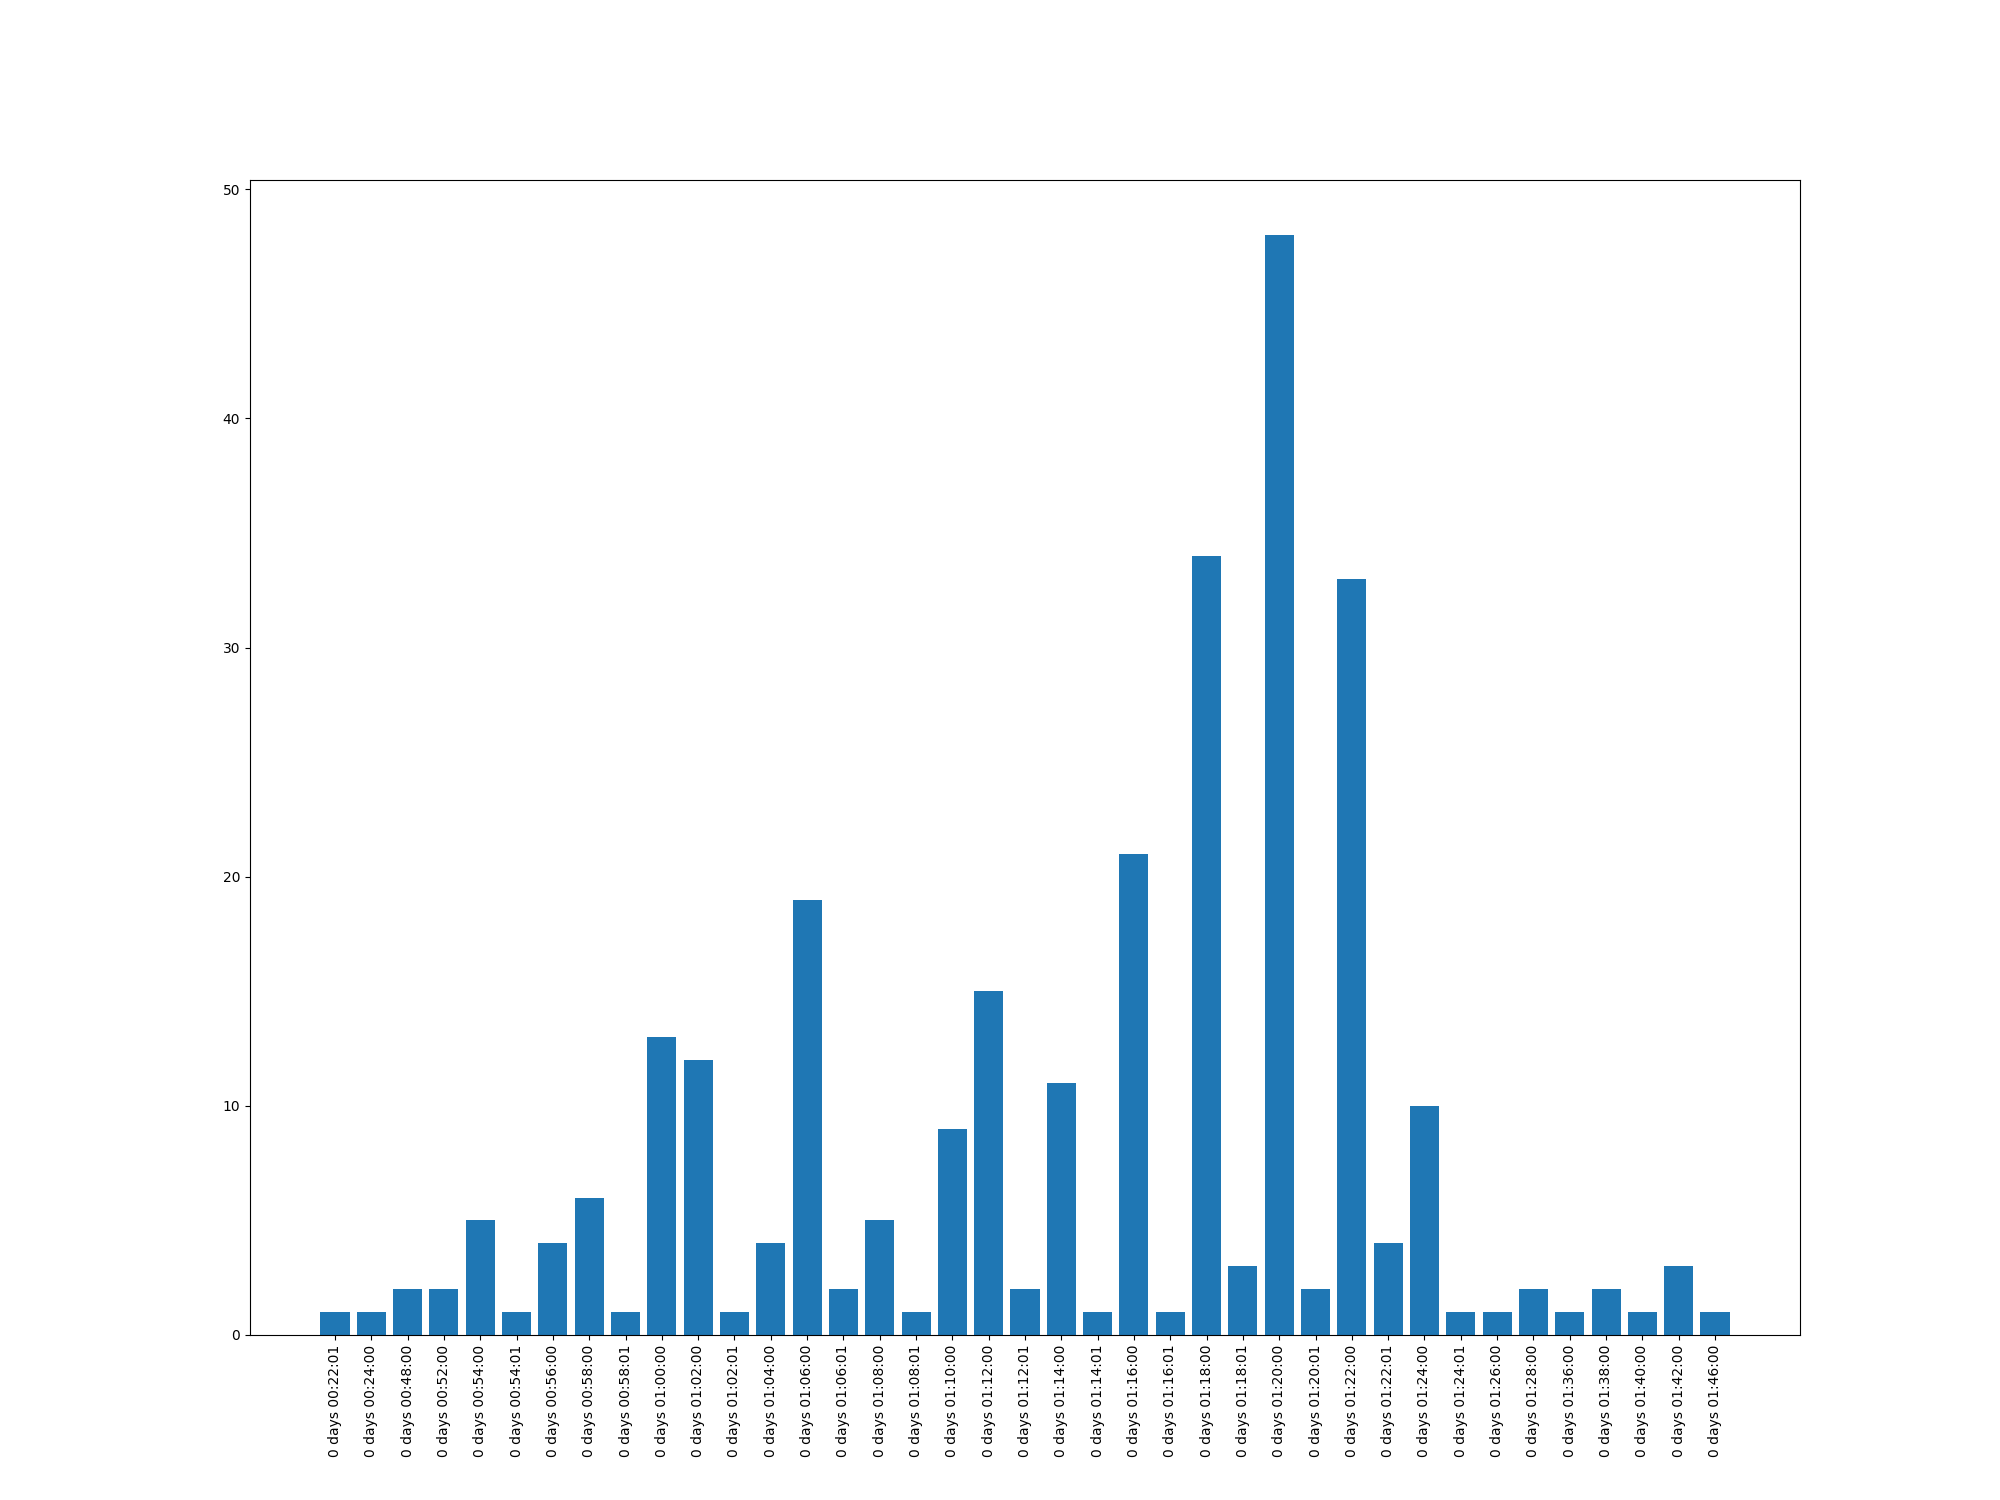

In [39]:
plt.figure(figsize=(20,15))
plt.xticks(rotation=90)

plt.bar(delta_df['time_delta'].astype(str),delta_df['count'])
plt.show()

%matplot plt